> 4/25
#### I was gonna do a basic linear regression but I spent too much time this afternoon troublesehooting a dumb error... and now that I've trained myself to `git pull upstream main` before starting significant work on the group project, I see $David$ has already done a thorough job so I'll be focusing on a random forests regression.

### got a random forest using the columns from David's 06 nb;
* got output,not sure how to read feature importances o
* what to do with residuals? 
* which other errors to check? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# transformer
from sklearn.model_selection import train_test_split

# scalers
from sklearn.preprocessing import StandardScaler

# regressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [3]:
# custom imports
import mymetrics as m                    # my module, single function open
plt.style.use('gstyle.mplstyle')         # stylesheet for sns

pd.options.display.max_columns = 90
pd.options.display.max_rows = 100

In [4]:
path = '../processed_data/all_merged2.csv'
df = pd.read_csv(path)

df.shape

(25444, 62)

In [5]:
df.describe()

,zip,total population,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides,pesticides pctl,traffic,traffic pctl,cleanup sites,cleanup sites pctl,groundwater threats,groundwater threats pctl,haz. waste,haz. waste pctl,imp. water bodies,imp. water bodies pctl,solid waste,solid waste pctl,pollution burden,pollution burden score,asthma,asthma pctl,low birth weight,low birth weight pctl,education,education pctl,linguistic isolation,linguistic isolation pctl,poverty,poverty pctl,pop. char.,pop. char. score,ces_score,year,census tract,drinking water,drinking water pctl,tox. release,tox. release pctl,pollution burden pctl,unemployment,unemployment pctl,pop. char. pctl,latitude,longitude,ces_per,cardiovascular disease,cardiovascular disease pctl,housing burden,housing burden pctl,census_year,est total,est gen,est cold,est farm,est other
count,25444.000000,25444.000000,25333.000000,25333.000000,25286.000000,25286.000000,25444.000000,25444.000000,25444.000000,25444.000000,25353.000000,25353.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25423.000000,25423.000000,24818.000000,24818.000000,25119.000000,25119.000000,24401.000000,24401.000000,25159.000000,25159.000000,25170.000000,25170.000000,25170.000000,25444.000000,2.410500e+04,24024.000000,24024.000000,24093.000000,24093.000000,24105.000000,23434.000000,23434.000000,23834.000000,24105.000000,24105.000000,15861.000000,16059.000000,16059.000000,15768.000000,15768.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000,25444.000000
mean,92864.446156,5917.335796,0.068468,47.320326,10.221574,51.367337,12.497526,50.444645,296.028216,18.939449,1105.403689,50.395897,9.652456,34.530816,24.495413,39.201126,0.645977,39.601655,3.501376,31.580457,2.088573,26.683368,41.996324,5.078898,49.093751,49.924365,5.115406,50.061368,18.824706,49.983857,10.429458,48.267254,34.256775,49.966068,49.782840,5.157084,27.347381,2017.421082,6.054896e+09,433.781216,50.379967,2589.932734,49.894164,50.006223,9.296006,50.224163,50.006294,35.495893,-119.409318,50.006305,10.837837,50.011075,18.908923,50.184404,2013.578958,1.959047,1.468716,0.181222,0.028730,0.280380
std,3380.897400,7251.318591,0.112443,30.957227,2.503114,29.032522,16.249286,28.787606,2555.276827,30.078159,1048.964909,28.804918,20.585180,33.356951,77.051628,32.829715,1.814200,32.686995,4.685733,33.731042,4.378235,32.829583,12.987478,1.573062,28.861319,28.936630,1.346745,28.862996,15.715502,28.876936,10.159722,29.755874,19.592505,28.834206,19.773458,2.049889,15.710478,2.979199,2.652170e+07,227.554237,28.856280,10924.243137,28.932557,28.868116,5.319320,28.832246,28.868120,2.085930,1.976254,28.868434,4.953450,28.891888,8.509076,28.835873,0.590788,5.277823,4.470229,0.757449,0.182993,0.718911
min,32.000000,0.000000,0.000000,0.000000,1.651081,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.577824,0.433750,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.010000,2013.000000,6.001400e+09,0.000000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,0.010000,32.547376,-124.297889,0.010000,0.000000,0.000000,0.800000,0.012674,2012.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91606.000000,3423.750000,0.030640,20.650000,8.559432,27.690338,0.000898,25.672060,0.000000,0.000000,496.140000,25.587500,0.000000,0.000000,0.750000,3.960000,0.010000,7.346128,0.000000,0.000000,0.000000,0.000000,32.263974,3.900000,28.565000,24.830000,4.472665,25.110000,6.200000,25.056948,2.900000,22.460000,17.900000,24.960000,34.150929,3.532668,14.680000,2014.000000,6.037264e+09,258.789440,25.002342,86.377098,24.840000,25.003111,5.400000,25.234253,25.010000,33.923946,-121.518587,25.010000,7.265000,25.000000,12.600000,25.323194,2013.000000,0.000000,0.000000,0.000000,0.000000,0.00

In [6]:
df.dropna(inplace=True)
df.shape

(14912, 62)

In [7]:
# X = X.fillna(X.median()) #fill with median value
# X = X1.dropna(inplace = True)
# X = X1.fillna(0)#
# X = df[['ozone']]

# X = 

# y = df['asthma']

In [8]:
#cutting out percentiles , lat/lon, zip, census tract, "scores"
initial_columns_to_fit =[
 'total population',
 'ozone',
 'pm2.5',
 'diesel pm',
 'pesticides',
 'traffic',
 'cleanup sites',
 'groundwater threats',
 'haz. waste',
 'imp. water bodies',
 'solid waste',
 'pollution burden',
 'asthma',
 'low birth weight',
 'education',
 'linguistic isolation',
 'poverty',
 'pop. char. ',
 'drinking water',
 'tox. release',
 'unemployment',
 'ces_per',
 'cardiovascular disease',
 'housing burden',
 'est total',
 'est gen',
 'est cold',
 'est farm',
 'est other']

In [9]:
# make a dataframe with just the initial_columns_to_fit, and all NaNs filled with median.
# amgd_cut = amgd[initial_columns_to_fit].fillna(amgd[initial_columns_to_fit].median())

y = df['asthma']

X = df[initial_columns_to_fit]
X.head()

,total population,ozone,pm2.5,diesel pm,pesticides,traffic,cleanup sites,groundwater threats,haz. waste,imp. water bodies,solid waste,pollution burden,asthma,low birth weight,education,linguistic isolation,poverty,pop. char.,drinking water,tox. release,unemployment,ces_per,cardiovascular disease,housing burden,est total,est gen,est cold,est farm,est other
9374,3174,0.065,15.4,48.524,2.75,909.14,80.50,45.75,0.795,0,21.75,79.96,131.64,7.44,53.3,16.2,76.3,92.12,681.20,18551.957190,17.6,100.00,14.13,26.0,7,6,1,0,0
9375,3167,0.062,15.4,47.445,3.03,576.52,22.00,30.25,0.200,0,2.50,71.16,142.12,10.16,42.3,16.7,86.8,94.58,681.20,12454.948410,16.1,99.97,14.96,40.1,7,6,1,0,0
9376,4106,0.065,15.4,20.848,1435.93,243.54,15.45,20.00,0.000,0,10.00,66.88,142.28,7.83,47.4,15.8,74.5,93.79,788.02,6996.962409,20.0,99.91,14.96,31.8,7,6,1,0,0
9377,5252,0.065,15.4,47.943,683.81,170.75,12.10,3.00,0.010,0,4.25,64.75,142.28,9.24,53.8,27.1,77.5,93.89,681.20,25476.583050,21.8,99.81,14.96,21.1,7,6,1,0,0
9378,964,0.062,15.4,13.163,1031.87,127.20,22.00,15.00,0.100,0,7.00,65.50,142.28,8.90,44.3,13.6,76.5,92.51,784.33,7265.254475,18.5,99.77,14.96,26.8,7,6,1,0,0


In [10]:
# running my first model calling function from my module
# returns list of metrics 
metrics_1 = m.allmet(X, y, 0.7);

In [11]:
metrics_1

(array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 DecisionTreeRegressor(),
 9374      -6.827603
 9375       3.652397
 9376       3.812397
 9377       3.812397
 9378       3.812397
             ...    
 25421   -122.847603
 25422   -126.187603
 25423   -123.317603
 25424   -124.887603
 25426   -129.717603
 Name: asthma, Length: 14912, dtype: float64)

In [116]:
# X = cal.drop(columns=[
#     'zip', 'total population', 'year', 'census_year', 'cardiovascular disease', 'cardiovascular disease pctl', 'housing burden pctl'
#     ])

#X = df.fillna(0)

# X = X.dropna(inplace = True)
# X.shape

In [110]:
X.describe()

,ozone,ozone pctl,pm2.5,pm2.5 pctl,diesel pm,diesel pm pctl,pesticides
count,25333.000000,25333.000000,25286.000000,25286.000000,25444.000000,25444.000000,25444.000000
mean,0.068468,47.320326,10.221574,51.367337,12.497526,50.444645,296.028216
std,0.112443,30.957227,2.503114,29.032522,16.249286,28.787606,2555.276827
min,0.000000,0.000000,1.651081,0.010000,0.000000,0.000000,0.000000
25%,0.030640,20.650000,8.559432,27.690338,0.000898,25.672060,0.000000
50%,0.045884,48.450529,10.370000,52.610000,7.650000,50.667918,0.000000
75%,0.059387,73.930000,12.050000,77.977844,19.760000,75.400000,0.488285
max,1.285954,100.000000,21.200000,100.000000,253.731000,100.000000,91316.190000


In [111]:
X.dtypes

ozone             float64
ozone pctl        float64
pm2.5             float64
pm2.5 pctl        float64
diesel pm         float64
diesel pm pctl    float64
pesticides        float64
dtype: object

In [88]:
## JUST TRY THE MODEL WITHOUT RUNNING THROUGH A FUNCTION FOR FFFFS SAKE
## this one does not have city, county, zip, year, census_year, cardio or total pop

> ### will need to SCALE because the metrics are all on diff scales. 
> ### also need to drop some of the columns that aren't predictor, or also maybe all the pctl ones since it's a duplicate 
> ### 

> ### my function will take a dummified, clean X, model and: 

* scale
* train test split 
* fit 

* cros val ? 

* make predictions 
* get residuals 

* calculate errors 
* print errors

train_prds = model.predict(X_train)
test_preds = model.predict(X_test)

In [ ]:
cal.isnull().sum()

In [ ]:
cal.dtypes

In [ ]:
cal.info()

In [ ]:
# cal.drop(columns=['cardiovascular disease', 'cardiovascular disease pctl'], inplace = True)
# X=X.fillna(X.median()) #fill with median value
#cal.fillna(0, inplace=True)

In [ ]:
import matplotlib.pyplot as plt
sns.heatmap(cal.corr()[['asthma']].drop(['asthma','longitude','census tract','latitude']))

plt.show()

In [ ]:
plt.subplots(1,1, figsize=(36,36))
sns.heatmap(cal.corr(), annot= True)
plt.show()

> # we still havne't figured out what to do with ozone, but should be a simple transformation

<AxesSubplot:xlabel='ozone', ylabel='poverty'>

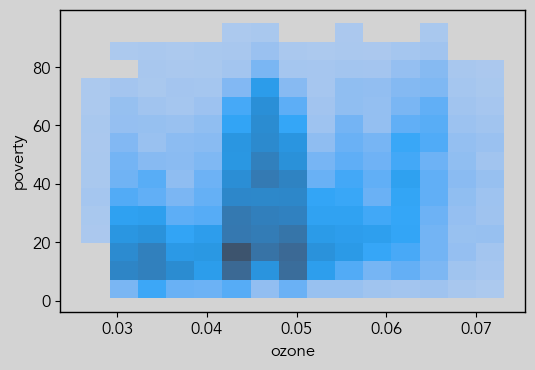

In [14]:
sns.histplot(data = df, x = 'ozone', y = 'poverty', bins = 15, palette='rgb')

<AxesSubplot:xlabel='ozone', ylabel='asthma'>

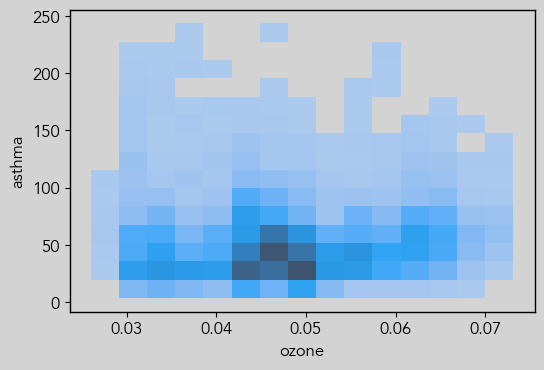

In [15]:
sns.histplot(data = df, x = 'ozone', y = 'asthma', bins = 15, palette='rgb')

In [ ]:
from sklearn.svm import SVR

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

In [ ]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [ ]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

In [ ]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [ ]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [ ]:
svr = SVR()
svr.fit(X_train, y_train)

In [ ]:
train_preds =  svr.predict(X_train)
test_preds= svr.predict(X_test)

In [ ]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

svr.score(X_train,y_train)

In [ ]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [ ]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
las = Lasso()
las.fit(X_train, y_train)

In [ ]:
train_preds =  las.predict(X_train)
test_preds= las.predict(X_test)

In [ ]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

las.score(X_train,y_train)

In [ ]:
X = cal[['CES 3.0 Score', 'Low Birth Weight', 'Cardiovascular Disease', 'Education', 'Linguistic Isolation', 'Poverty', 'Unemployment', 'Housing Burden']]
y = cal['Asthma Pctl']

In [ ]:
X=pd.get_dummies(X)
X=X.fillna(X.median())

In [ ]:
X_train, X_test, y_train,y_test = train_test_split(X,y,random_state= 42, test_size=.2)

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
rid = Ridge()
rid.fit(X_train, y_train)

In [ ]:
train_preds =  rid.predict(X_train)
test_preds= rid.predict(X_test)

In [ ]:
print(f'Train error: {mean_squared_error(y_train,train_preds)}')
print(f'Test error: {mean_squared_error(y_test,test_preds)}')

rid.score(X_train,y_train)